This kernel is going to solve [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview), a popular competition on Kaggle. This competition's dataset can be downloaded from the following [link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

**Competition Description:**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# Import Libraries
First, we import necessary libraries, such as:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Import The Data

In [2]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# Read The Data

In [3]:
#set display.max_columns to display all columns
pd.set_option('display.max_columns', None)

In [4]:
train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
187,188,50,RL,60.0,10410,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,7,1916,1987,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,660,660,GasA,Ex,Y,SBrkr,808,704,144,1656,0,0,2,1,3,1,TA,8,Min2,0,NaN,Detchd,1916.0,Unf,1,180,Fa,Fa,N,0,0,0,140,0,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,135000
548,549,20,RM,49.0,8235,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,OldTown,Feedr,RRNn,1Fam,1Story,5,7,1955,1995,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,LwQ,180,Rec,645,0,825,GasA,TA,Y,SBrkr,825,0,0,825,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1963.0,RFn,2,720,TA,TA,Y,140,50,0,0,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,125000
1301,1302,70,RL,NaN,7500,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,6,7,1942,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,547,Unf,0,224,771,GasA,Fa,Y,SBrkr,753,741,0,1494,0,0,1,0,3,1,Gd,7,Typ,2,Gd,Attchd,1942.0,Unf,1,213,TA,TA,P,0,0,0,0,224,0,NaN,NaN,NaN,0,11,2009,WD,Normal,177500
278,279,20,RL,107.0,14450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2006,2007,Gable,CompShg,CemntBd,CmentBd,BrkFace,315.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,2121,2121,GasA,Ex,Y,SBrkr,2121,0,0,2121,0,0,2,1,3,1,Ex,8,Typ,1,Ex,Attchd,2007.0,Fin,3,732,TA,TA,Y,124,98,0,0,142,0,NaN,NaN,NaN,0,5,2007,New,Partial,415298
1368,1369,120,RM,NaN,4435,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,170.0,Gd,TA,PConc,Gd,TA,Av,GLQ,685,Unf,0,163,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,4,Typ,0,NaN,Attchd,2003.0,Fin,2,420,TA,TA,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,144000


Now, let's take a quick look at the train and test datasets to gain some initial insight.

In [12]:
combined_data = pd.concat([train, test], ignore_index=True)

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [13]:
combined_data.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,2919.000000,2919.000000,2915,2433.000000,2919.000000,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919.000000,2919.000000,2919.000000,2919.000000,2919,2919,2918,2918,2895,2896.000000,2919,2919,2919,2838,2837,2837,2840,2918.000000,2839,2918.000000,2918.000000,2918.000000,2919,2919,2919,2918,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918,2919.000000,2917,2919.000000,1499,2762,2760.000000,2760,2918.000000,2918.000000,2760,2760,2919,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,10,571,105,2919.000000,2919.000000,2919.000000,2918,2919,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,2265,NaN,NaN,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,NaN,NaN,NaN,NaN,2310,2876,1025,1014,1742,NaN,1798,2538,1308,1283,2606,1904,851,NaN,2493,NaN,NaN,NaN,2874,1493,2723,2671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1492,NaN,2717,NaN,744,1723,NaN,1230,NaN,NaN,2604,2654,2641,NaN,NaN,NaN,NaN,NaN,NaN,4,329,95,NaN,NaN,NaN,2525,2402,NaN
mean,1460.000000,57.137718,NaN,69.305795,10168.114080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.089072,5.564577,1971.312778,1984.264474,NaN,NaN,NaN,NaN,NaN,102.201312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441.423235,NaN,49.582248,560.772104,1051.777587,NaN,NaN,NaN,NaN,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,NaN,6.451524,NaN,0.597122,NaN,NaN,1978.113406,NaN,1.766621,472.874572,NaN,NaN,NaN,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,NaN,NaN,NaN,50.825968,6.213087,2007.792737,NaN,NaN,180921.195890
std,842.787043,42.517628,NaN,23.344905,7886.996359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.409947,1.113131,30.291442,20.894344,NaN,NaN,NaN,NaN,NaN,179.334253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.610826,NaN,169.205611,439.543659,440.766258,NaN,NaN,NaN,NaN,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,NaN,1.569379,NaN,0.646129,NaN,NaN,25.574285,NaN,0.761624,215.394815,NaN,NaN,NaN,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,NaN,NaN,NaN,567.402211,2.714762,1.314964,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,

Check for missing values

In [31]:
combined_data.isnull().sum().sort_values(ascending=False).head(36)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
GarageArea         1
BsmtFinSF2         1
Exterior1st        1
TotalBsmtSF        1
GarageCars         1
BsmtUnfSF          1
Electrical         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
Exterior2nd        1
Street             0
dtype: int64

### Quick observations on the combined data
* Total houses: 2919
* Feature that can be dropped from training immediately:
    * **SalePrice:** Target array.
    * **Id**
* There is feature that given in numerical but contain categorical variables. Therefore, we have to converted to categorical variables. These features are: 
    * **MSSubClass** 
* From data_description.txt, there are None value that mean house did not have that kind of feature. So, we can fill missing values with string, e.g. 'None'. These features are:
    * **Alley** 
    * **FireplaceQu** 
    * **Fence** 
    * **MiscFeature** 
    * **MasVnrType:** Need to double check this missing values with the MasVnrArea feature. If NaN value in the MasVnrType feature but the MasVnrArea feature has non-zero value, then we must fill the missing value with type. Otherwise, NaN value means no type and we can fill missing values with string to represents no type.
    * **PoolQC:** Need to double check this missing values with the PoolArea feature. If NaN value in the PoolQC feature but the PoolArea feature has non-zero value, then we must fill the missing value with pool quality. Otherwise, NaN value means no pool and we can fill missing values with string to represents no pool.
* Features that have missing values:
    * **MSZoning:** There are 4 missing values.
    * **LotFrontage:** There are some missing data around 16.6%
    * **Utilities:** There are 2 missing values.
    * **Exterior1st:** There is 1 missing value.
    * **Exterior2nd:** There is 1 missing value. But, since the Exterior2nd feature is optional, we have to investigate further.
    * **MasVnrArea:** There are some missing data around 0.8%
    * **Electrical:** There is 1 missing value.
    * **KitchenQual:** There is 1 missing value.
    * **Functional:** There are 2 missing values. Note from data_description.txt: '(Assume typical unless deductions are warranted)'
    * **SaleType:** There is 1 missing value.
* Features that need more deep analysis:
    * **Bsmt++:** Features that start with Bsmt.
    * **Garage++:** Features that start with Garage.

### Correlation of all the train features with target variable

In [32]:
(train.corr()**2)['SalePrice'].sort_values(ascending = False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

Plot some top of the most correlated one.

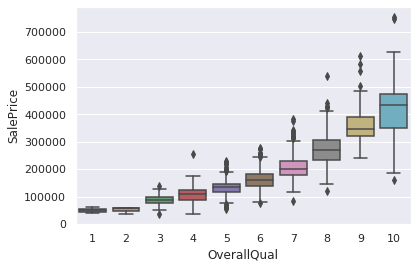

In [33]:
sns.boxplot(train['OverallQual'], train['SalePrice']);

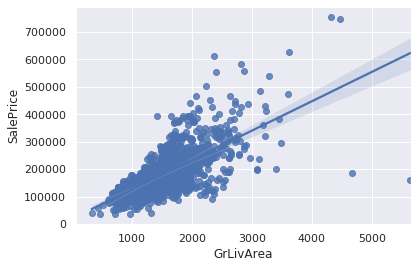

In [34]:
sns.regplot(train['GrLivArea'], train['SalePrice']);

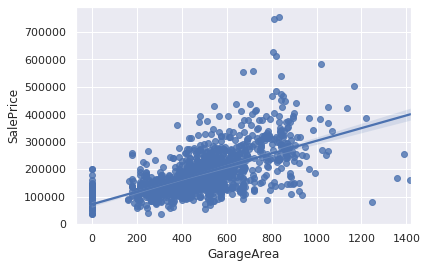

In [35]:
sns.regplot(train['GarageArea'], train['SalePrice']);

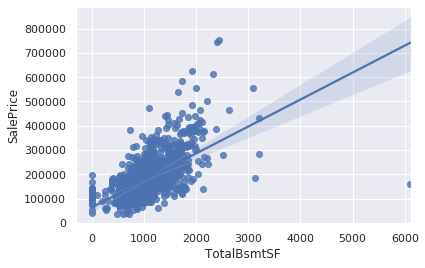

In [36]:
sns.regplot(train['TotalBsmtSF'], train['SalePrice']);

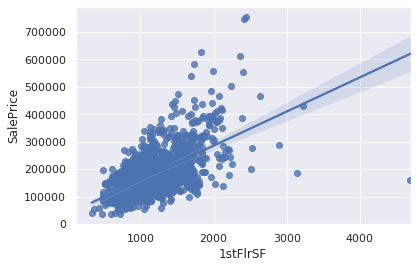

In [37]:
sns.regplot(train['1stFlrSF'], train['SalePrice']);

**Quick observations on the correlation:**
* From the plots above, I think the residuals are not pure random fluctuations around the true line, which is bad news. Let's plot residual to make sure.

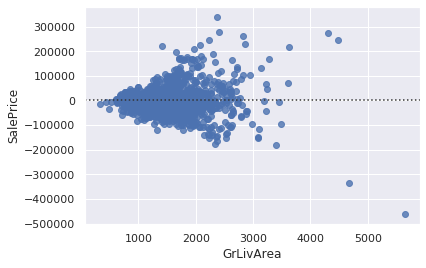

In [38]:
sns.residplot(train['GrLivArea'], train['SalePrice']);

* The residuals plot shows that as GrLivArea value increases, the variance also increases, which is the characteristics known as Heteroscedasticity.
* Get rid of outliers?
* Need to check distirbution of target array and all training features.

### Target Array
check distribution of target array

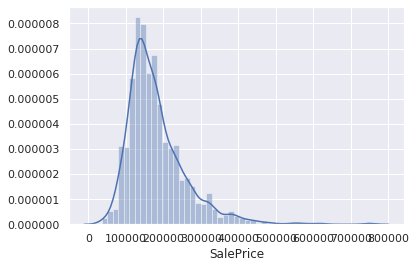

In [39]:
sns.distplot(train['SalePrice']);

From the graph above we can see that distribution of target array is not following a normal distribution. We can transform it using numpy.log1p, so target array follows a normal distribution. 

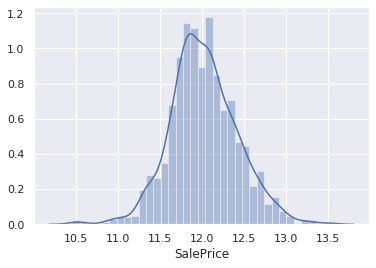

In [40]:
#use numpy.log1p in order to target variable follows a normal distribution 
train['SalePrice'] = np.log1p(train['SalePrice'])

sns.distplot(train['SalePrice']);

After transformed, residual plot become:

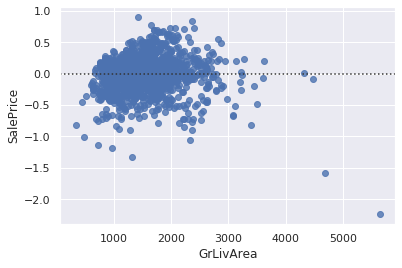

In [41]:
#check residual plot after transformed
sns.residplot(train['GrLivArea'], train['SalePrice']);

# Exploratory Data Analysis

In [42]:
#check for outliers
#quantile_high = train['SalePrice'].quantile(0.99)
#quantile_low = train['SalePrice'].quantile(0.01)

#outliers_id = train[(train['SalePrice'] > quantile_high) | (train['SalePrice'] < quantile_low)].index

### Drop Features

In [43]:
#copy features that are needed later
target_array = train['SalePrice'].copy()
test_id = test['Id'].copy()

#drop features
train.drop(['Id','SalePrice'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

print(train.shape)
print(test.shape)

(1460, 79)
(1459, 79)


### Change to Categorical

In [44]:
#change to categorical
train['MSSubClass'] = train['MSSubClass'].astype('str')
test['MSSubClass'] = test['MSSubClass'].astype('str')

### (Some) 'None' Values According to data_description.txt

In [45]:
features_with_none = ['Alley', 
                     'FireplaceQu',
                     'Fence',
                     'MiscFeature']

for feature in features_with_none:
    train[feature].fillna('None', inplace=True)
    test[feature].fillna('None', inplace=True)

### Fill Missing Data : With Mode

In [46]:
#fill missing values with mode 
features_fill_with_mode = ['Utilities',
                           'Exterior1st',
                           'Exterior2nd',
                           'Electrical',
                           'KitchenQual',
                           'Functional',
                           'SaleType']

for feature in features_fill_with_mode:
    train[feature].fillna(train[feature].mode()[0], inplace=True)
    test[feature].fillna(test[feature].mode()[0], inplace=True)

### Fill Missing Data: Special Treatment
- MSZoning Feature

In [47]:
#fill missing values with mode of each MSSubClass
train['MSZoning'] = train.groupby('MSSubClass')['MSZoning'].apply(lambda df: df.fillna(df.mode()[0]))
test['MSZoning'] = test.groupby('MSSubClass')['MSZoning'].apply(lambda df: df.fillna(df.mode()[0]))

- LotFrontage Feature

In [48]:
#fill missing values with mean of each Neighborhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].apply(lambda df: df.fillna(df.mean()))
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].apply(lambda df: df.fillna(df.mean()))

- MasVnrType Feature

In [49]:
#Train dataset
#check if there are missing values in the MasVnrType, but the MasVnrArea != 0
mas_vnr_features = ['MasVnrArea','MasVnrType']

mask = (train['MasVnrArea'] != 0) & \
       train['MasVnrArea'].notnull() & \
       train['MasVnrType'].isnull()

train[mask][mas_vnr_features]

,MasVnrArea,MasVnrType


In [50]:
#Test dataset
#check if there are missing values in the MasVnrType, but the MasVnrArea != 0
mask = (test['MasVnrArea'] != 0) & \
       test['MasVnrArea'].notnull() & \
       test['MasVnrType'].isnull()

test[mask][mas_vnr_features]

,MasVnrArea,MasVnrType
1150,198.0,NaN


In [51]:
#fill missing data
train['MasVnrType'].fillna('None', inplace=True)

test.loc[mask, 'MasVnrType'] = test['MasVnrType'].mode()[0]
test['MasVnrType'].fillna('None', inplace=True)

- MasVnrArea Feature

In [52]:
#Train dataset
#check if there are missing values in the MasVnrArea, but the MasVnrType != 'None'
mask = (train['MasVnrType'] != 'None') & \
        train['MasVnrArea'].isnull()

train[mask][mas_vnr_features]

,MasVnrArea,MasVnrType


In [53]:
#Test dataset
#check if there are missing values in the MasVnrArea, but the MasVnrType != 'None'
mask = (test['MasVnrType'] != 'None') & \
        test['MasVnrArea'].isnull()

test[mask][mas_vnr_features]

,MasVnrArea,MasVnrType


In [54]:
#fill missing data with 0
train['MasVnrArea'].fillna(0, inplace=True)
test['MasVnrArea'].fillna(0, inplace=True)

- PoolQC Feature

In [55]:
#Train dataset
#check if there are missing values in the PoolQC, but the PoolArea != 0
pool_features = ['PoolArea','PoolQC']

mask = (train['PoolArea'] != 0) & \
       train['PoolQC'].isnull()

train[mask][pool_features]

,PoolArea,PoolQC


In [56]:
#Test dataset
#check if there are missing values in the PoolQC, but the PoolArea != 0
mask = (test['PoolArea'] != 0) & \
       test['PoolQC'].isnull()

test[mask][pool_features]

,PoolArea,PoolQC
960,368,NaN
1043,444,NaN
1139,561,NaN


In [57]:
#fill missing values
train['PoolQC'].fillna('None', inplace=True)

test.loc[mask, 'PoolQC'] = test['PoolQC'].mode()[0]
test['PoolQC'].fillna('None', inplace=True)

### Basement Features
- Categorical features

In [58]:
#Train dataset
#check if there are missing values in the categorical features, but the TotalBsmtSF != 0
bsmt_features_1 = ['BsmtQual','BsmtFinType1','BsmtFinType2','BsmtCond','BsmtExposure']

mask = (train['BsmtQual'].isnull() | \
        train['BsmtFinType1'].isnull() | \
        train['BsmtFinType2'].isnull() | \
        train['BsmtCond'].isnull() | \
        train['BsmtExposure'].isnull() ) \
        & \
       ((train['TotalBsmtSF'] != 0) & \
        train['TotalBsmtSF'].notnull())

train[mask][np.concatenate([bsmt_features_1,['TotalBsmtSF']])]

,BsmtQual,BsmtFinType1,BsmtFinType2,BsmtCond,BsmtExposure,TotalBsmtSF
332,Gd,GLQ,NaN,TA,No,3206
948,Gd,Unf,Unf,TA,NaN,936


In [59]:
#Test dataset
#check if there are missing values in the categorical features, but the TotalBsmtSF != 0
mask = (test['BsmtQual'].isnull() | \
        test['BsmtFinType1'].isnull() | \
        test['BsmtFinType2'].isnull() | \
        test['BsmtCond'].isnull() | \
        test['BsmtExposure'].isnull() ) \
        & \
       ((test['TotalBsmtSF'] != 0) & \
        test['TotalBsmtSF'].notnull())

test[mask][np.concatenate([bsmt_features_1,['TotalBsmtSF']])]

,BsmtQual,BsmtFinType1,BsmtFinType2,BsmtCond,BsmtExposure,TotalBsmtSF
27,Gd,Unf,Unf,TA,NaN,1595.0
580,Gd,GLQ,Rec,NaN,Mn,1426.0
725,TA,BLQ,Unf,NaN,No,1127.0
757,NaN,Unf,Unf,Fa,No,173.0
758,NaN,Unf,Unf,TA,No,356.0
888,Gd,Unf,Unf,TA,NaN,725.0
1064,TA,ALQ,Unf,NaN,Av,995.0


In [60]:
#fill missing data
for feature in bsmt_features_1:
    train.loc[mask & train[feature].isnull(), feature] = train[feature].mode()[0]
    train[feature].fillna('None', inplace=True)
    
    test.loc[mask & test[feature].isnull(), feature] = test[feature].mode()[0]
    test[feature].fillna('None', inplace=True)

- Numerical feature

In [62]:
#Train dataset
#check if there are missing values in the numerical features, but the BsmtQual != 'None'
bsmt_features_2 = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']

mask = (train['BsmtFinSF1'].isnull() | \
        train['BsmtFinSF2'].isnull() | \
        train['BsmtUnfSF'].isnull() | \
        train['TotalBsmtSF'].isnull() | \
        train['BsmtFullBath'].isnull() | \
        train['BsmtHalfBath'].isnull() ) \
        & \
       (train['BsmtQual'] != 'None')

train[mask][np.concatenate([bsmt_features_2,['BsmtQual']])]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,BsmtQual


In [63]:
#Test dataset
#check if there are missing values in the numerical features, but the BsmtQual != 'None'
mask = (test['BsmtFinSF1'].isnull() | \
        test['BsmtFinSF2'].isnull() | \
        test['BsmtUnfSF'].isnull() | \
        test['TotalBsmtSF'].isnull() | \
        test['BsmtFullBath'].isnull() | \
        test['BsmtHalfBath'].isnull() ) \
        & \
       (test['BsmtQual'] != 'None')

test[mask][np.concatenate([bsmt_features_2,['BsmtQual']])]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,BsmtQual


In [64]:
#fill missing data with 0
for feature in bsmt_features_2:
    train[feature].fillna(0, inplace=True)
    test[feature].fillna(0, inplace=True)

### Garage Features
- Categorical feature

In [65]:
#Train dataset
#check if there are missing values in the categorical features, but the GarageCars or GarageArea != 0
garage_features_1 = ['GarageType','GarageFinish','GarageQual','GarageCond']

mask = (train['GarageType'].isnull() | \
        train['GarageFinish'].isnull() | \
        train['GarageQual'].isnull() | \
        train['GarageCond'].isnull()) \
        & \
       ((train['GarageCars'] != 0) | \
        (train['GarageArea'] !=0)) 

train[mask][np.concatenate([garage_features_1,['GarageCars','GarageArea']])]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageCars,GarageArea


In [66]:
#Test dataset
#check if there are missing values in the categorical features, but the GarageCars or GarageArea != 0
garage_features_1 = ['GarageType','GarageFinish','GarageQual','GarageCond']

mask = (test['GarageType'].isnull() | \
        test['GarageFinish'].isnull() | \
        test['GarageQual'].isnull() | \
        test['GarageCond'].isnull()) \
        & \
       ((test['GarageCars'] != 0) | \
        (test['GarageArea'] !=0)) 

test[mask][np.concatenate([garage_features_1,['GarageCars','GarageArea']])]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageCars,GarageArea
666,Detchd,NaN,NaN,NaN,1.0,360.0
1116,Detchd,NaN,NaN,NaN,NaN,NaN


In [67]:
#fill missing data
for feature in garage_features_1:
    train[feature].fillna('None', inplace=True)
    
    test.loc[mask & test[feature].isnull(), feature] = test[feature].mode()[0]
    test[feature].fillna('None', inplace=True)

- Numerical feature

In [68]:
#Train dataset
#check if there are missing values in the numerical features, but the GarageType != 'None'
garage_features_2 = ['GarageYrBlt','GarageCars','GarageArea']

mask = (train['GarageYrBlt'].isnull() | \
        train['GarageCars'].isnull() | \
        train['GarageArea'].isnull() ) \
        & \
       (train['GarageType'] != 'None')

train[mask][np.concatenate([garage_features_2,['GarageType']])]

,GarageYrBlt,GarageCars,GarageArea,GarageType


In [69]:
#Test dataset
#check if there are missing values in the numerical features, but the GarageType != 'None'
garage_features_2 = ['GarageYrBlt','GarageCars','GarageArea']

mask = (test['GarageYrBlt'].isnull() | \
        test['GarageCars'].isnull() | \
        test['GarageArea'].isnull() ) \
        & \
       (test['GarageType'] != 'None')

test[mask][np.concatenate([garage_features_2,['GarageType']])]

,GarageYrBlt,GarageCars,GarageArea,GarageType
666,NaN,1.0,360.0,Detchd
1116,NaN,NaN,NaN,Detchd


-- GarageYrBlt

In [70]:
test.loc[mask, ['GarageYrBlt','YearBuilt']]

,GarageYrBlt,YearBuilt
666,NaN,1910
1116,NaN,1923


In [71]:
#fill above missing data as same as YearBuilt
test.loc[mask, 'GarageYrBlt'] = test.loc[mask, 'YearBuilt'].astype('float64')

#fill the rest with 0
test['GarageYrBlt'].fillna(0, inplace=True)
train['GarageYrBlt'].fillna(0, inplace=True)

- GarageCars and GarageArea

In [72]:
#fill missing data with mode for Detchd GarageType
test['GarageCars'].fillna(test.groupby('GarageType')['GarageCars'].agg(pd.Series.mode)['Detchd'], inplace=True)

#fill missing data with ean for Detchd GarageType
test['GarageArea'].fillna(test.groupby('GarageType')['GarageArea'].mean()['Detchd'], inplace=True)

### Exploratory Data Analysis: Epilogue
- Check for any missing data

In [73]:
#check for any missing data
print('missing data in the train dataset : ', train.isnull().any().sum())
print('missing data in the test dataset : ', test.isnull().any().sum())

missing data in the train dataset :  0
missing data in the test dataset :  0


In [74]:
#train_copy = train.copy()
#test_copy = test.copy()

* Creating new features

In [75]:
datasets = [train, test]

for dataset in datasets:
    #dataset['house_age'] = ((dataset['YrSold'] - dataset['YearRemodAdd']) + (dataset['MoSold'] / 12)) / 10
    dataset['TotalSF'] = (dataset['TotalBsmtSF'] \
                       + dataset['1stFlrSF'] \
                       + dataset['2ndFlrSF'])
    
    dataset['total_bathrooms'] = dataset['BsmtFullBath'] + dataset['FullBath'] + \
                                 (0.5 * (dataset['BsmtHalfBath'] +  dataset['HalfBath']))
    
    dataset['Total_porch_sf'] = (dataset['OpenPorchSF'] \
                              + dataset['3SsnPorch'] \
                              + dataset['EnclosedPorch'] \
                              + dataset['ScreenPorch'] \
                              + dataset['WoodDeckSF'])
    
    dataset['has_been_remod'] = (dataset['YearBuilt'] != dataset['YearRemodAdd'])
    dataset['has_garage'] = dataset['GarageType'] != 'None'
    dataset['has_basement'] = dataset['BsmtQual'] != 'None'
    dataset['has_2ndFloor'] = dataset['2ndFlrSF'] > 0
    dataset['has_fireplace'] = dataset['Fireplaces'] > 0
    dataset['has_pool'] = dataset['PoolArea'] > 0
    dataset['has_fence'] = dataset['Fence'] != 'None'

- Normality test

In [76]:
#define a normality test function
def normalityTest(data, alpha=0.05):
    """data (array)   : The array containing the sample to be tested.
	   alpha (float)  : Significance level.
	   return True if data is normal distributed"""
    
    from scipy import stats
    
    statistic, p_value = stats.normaltest(data)
    
    #null hypothesis: array comes from a normal distribution
    if p_value < alpha:  
        #The null hypothesis can be rejected
        is_normal_dist = False
    else:
        #The null hypothesis cannot be rejected
        is_normal_dist = True
    
    return is_normal_dist

In [77]:
#check normality of all numericaal features and transform it if not normal distributed
for feature in train.columns:
    if (train[feature].dtype != 'object'):
        if normalityTest(train[feature]) == False:
            train[feature] = np.log1p(train[feature])
            test[feature] = np.log1p(test[feature])

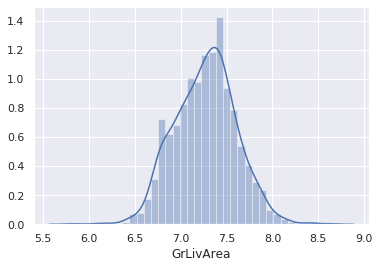

In [78]:
#check distribution after transformation
sns.distplot(train['GrLivArea']);

* Creating dummies

In [79]:
#combine the train and the test datasets
train['Source'] = 'train'
test['Source'] = 'test'

combined_data = pd.concat([train, test], ignore_index=True)

print(train.shape, test.shape, combined_data.shape)

(1460, 90) (1459, 90) (2919, 90)


In [80]:
#create dummies
combined_data = pd.get_dummies(combined_data, drop_first=True)

combined_data.shape

(2919, 284)

* Creating features matrix (X) and target array (y)

In [81]:
X = combined_data[combined_data['Source_train'] == 1].copy()
X.drop(['Source_train'], axis=1, inplace=True)

y = target_array

X_predict = combined_data[combined_data['Source_train'] == 0].copy()
X_predict.drop(['Source_train'], axis=1, inplace=True)

* Check for overfitting

In [82]:
for i in X.columns:
    counts = X[i].value_counts()
    print (counts)

4.110874    143
4.262680     70
4.394449     69
3.931826     57
4.330733     53
           ... 
4.927254      1
3.688879      1
4.718499      1
5.010635      1
4.934474      1
Name: LotFrontage, Length: 133, dtype: int64
8.881975    25
9.169623    24
8.699681    17
9.036106    14
9.105091    14
            ..
8.981053     1
9.224539     1
9.395242     1
9.185945     1
9.503085     1
Name: LotArea, Length: 1073, dtype: int64
1.791759    397
1.945910    374
2.079442    319
2.197225    168
1.609438    116
2.302585     43
1.386294     20
2.397895     18
1.098612      3
0.693147      2
Name: OverallQual, dtype: int64
1.791759    821
1.945910    252
2.079442    205
2.197225     72
1.609438     57
1.386294     25
2.302585     22
1.098612      5
0.693147      1
Name: OverallCond, dtype: int64
7.604396    67
7.603898    64
7.603399    54
7.604894    49
7.602900    45
            ..
7.559038     1
7.556951     1
7.535297     1
7.536897     1
7.540622     1
Name: YearBuilt, Length: 112, dtype: in

0    1386
1      74
Name: Neighborhood_Sawyer, dtype: int64
0    1401
1      59
Name: Neighborhood_SawyerW, dtype: int64
0    1374
1      86
Name: Neighborhood_Somerst, dtype: int64
0    1435
1      25
Name: Neighborhood_StoneBr, dtype: int64
0    1422
1      38
Name: Neighborhood_Timber, dtype: int64
0    1449
1      11
Name: Neighborhood_Veenker, dtype: int64
0    1379
1      81
Name: Condition1_Feedr, dtype: int64
1    1260
0     200
Name: Condition1_Norm, dtype: int64
0    1452
1       8
Name: Condition1_PosA, dtype: int64
0    1441
1      19
Name: Condition1_PosN, dtype: int64
0    1449
1      11
Name: Condition1_RRAe, dtype: int64
0    1434
1      26
Name: Condition1_RRAn, dtype: int64
0    1458
1       2
Name: Condition1_RRNe, dtype: int64
0    1455
1       5
Name: Condition1_RRNn, dtype: int64
0    1454
1       6
Name: Condition2_Feedr, dtype: int64
1    1445
0      15
Name: Condition2_Norm, dtype: int64
0    1459
1       1
Name: Condition2_PosA, dtype: int64
0    1458
1       

In [83]:
def overfit_zeros(df, limit=99.95):
    """df (dataframe)  : data
       limit (float)   : limit to be called overfitted
       Returns a list of features that have redundant zeroes and caused overfitting.
    """
    overfit = []
    
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > limit:
            overfit.append(i)
            
    overfit = list(overfit)
    
    return overfit

In [84]:
#drop overfitted features
features_overfitted_train = overfit_zeros(X)

X.drop(features_overfitted_train, axis=1, inplace=True)
X_predict.drop(features_overfitted_train, axis=1, inplace=True)

# Creating a Model

In this case, we will compare Linear Regression model and Gradient Boosting Regressor to get the smallest Mean Squared Error (MSE). We begin by splitting data into two subsets: for training data and for testing data.

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state = 0)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

model_linear_reg = LinearRegression()
model_GBReg = GradientBoostingRegressor()

In [88]:
#search grid for optimal parameters
from sklearn.model_selection import GridSearchCV

linear_reg_param_grid = {'normalize': [True, False],
                         'n_jobs': [None, -1]}

GBReg_param_grid = {'n_estimators' : [3000],
                    'learning_rate' : [0.05],
                    'max_depth' : [4],
                    'max_features' : ['sqrt'],
                    'min_samples_leaf' : [15],
                    'min_samples_split' : [10],
                    'loss' : ['huber'],
                    'random_state' : [42]}

grid_linear_reg = GridSearchCV(model_linear_reg, linear_reg_param_grid, cv=5)
grid_GBReg = GridSearchCV(model_GBReg, GBReg_param_grid, cv=5)

grid_linear_reg.fit(X_train, y_train)
grid_GBReg.fit(X_train, y_train)

#print(grid.best_params_)
#print(grid.best_score_)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [89]:
#calculate Mean Squared Error
from sklearn.metrics import mean_squared_error

print('MSE linear regression: ', mean_squared_error(y_test, grid_linear_reg.best_estimator_.predict(X_test)))
print('MSE Gradient Boosting Regressor : ', mean_squared_error(y_test, grid_GBReg.best_estimator_.predict(X_test)))

MSE linear regression:  0.0199487065549333
MSE Gradient Boosting Regressor :  0.011674093709881473


In [90]:
#use the best model
model = grid_GBReg.best_estimator_
y_predict = model.predict(X_predict)

#transform the values back
y_predict = np.expm1(y_predict)

In [91]:
#sava results to a file
results = pd.DataFrame({'Id': test_id, 'SalePrice': y_predict})
results.to_csv('my_submission.csv', index=False)